<a href="https://colab.research.google.com/github/OULEDDEHOU/Time-Series-Forcasting-with-RNN-/blob/master/Comment_utiliser_RNN_pour_faire_des_pr%C3%A9dictions_sur_notre_Airpassengers_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from  google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['AirPassengers.csv']),usecols=[1]) 

In [ ]:
data.head(10)

,#Passengers
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


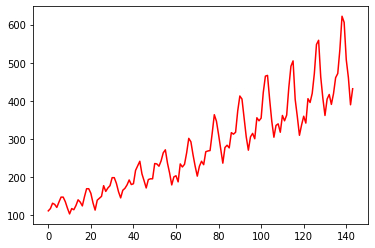

In [ ]:
plt.plot(data,c="r")

In [ ]:
dataset = data.values
dataset = dataset.astype('float32')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
dataset = scaler.fit_transform(dataset)

In [ ]:
train_size = int(len(dataset) * 0.66)

In [ ]:
train, test = dataset[:train_size], dataset[train_size:]

In [ ]:
train.shape

(95, 1)

In [ ]:
test.shape

(49, 1)

In [ ]:
#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1)
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [ ]:
seq_size = 15

In [ ]:
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model = Sequential()
model.add(SimpleRNN(40, activation='tanh', return_sequences=True, input_shape=(None, seq_size)))
model.add(SimpleRNN(40, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 40)          2240      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 5,521
Trainable params: 5,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Epoch 1/100
3/3 - 3s - loss: 0.0781 - val_loss: 0.1728 - 3s/epoch - 1s/step
Epoch 2/100
3/3 - 0s - loss: 0.0146 - val_loss: 0.0284 - 32ms/epoch - 11ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0072 - val_loss: 0.0259 - 30ms/epoch - 10ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0184 - val_loss: 0.0308 - 32ms/epoch - 11ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0173 - val_loss: 0.0188 - 37ms/epoch - 12ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0089 - val_loss: 0.0221 - 39ms/epoch - 13ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0041 - val_loss: 0.0427 - 39ms/epoch - 13ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0050 - val_loss: 0.0568 - 32ms/epoch - 11ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0064 - val_loss: 0.0525 - 29ms/epoch - 10ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0054 - val_loss: 0.0367 - 57ms/epoch - 19ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0036 - val_loss: 0.0220 - 30ms/epoch - 10ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0031 - val_loss: 0.0149 - 30ms/epoch - 10ms/step
Epoch 13/100
3/3 - 0s - loss: 0.0034 - va

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 8ms/step


In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 14.17 RMSE
Test Score: 38.11 RMSE


In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

In [ ]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

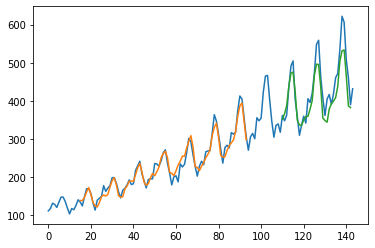

In [ ]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()